In [1]:
%matplotlib inline

import cv2
import numpy as np
from scipy.signal import savgol_filter
from scipy.ndimage import rotate
import PIL
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq, fftshift
from libmtf import read_image, Point, ROI, get_roi, get_hamming, get_deriv1, get_centroid, get_polyfit, get_fir2fix, project2

In [2]:
def plot_images(image, title):
    plt.title(title)
    plt.imshow(image, "gray")
    plt.colorbar()

def step0_load_image(psf_image_filename):
    image = read_image(psf_image_filename)
    return image

def step1_get_psf(image, line_number, orientation):
    if orientation == "H":
        return image[line_number, :]
    else:
        return image[:, line_number]

def step9_get_mtf(psf):
    nn = psf.shape[0]
    freq = [i / nn for i in range(nn)]
    efl = 60
    px = 3.45

    lppd = px/efl/1000 * 180/3.14159
    freq = np.array(freq)/lppd
    freq = np.array(freq)

    mtf = abs(fft(psf))
    mtf = mtf/mtf.max()
    return mtf, freq

uint8


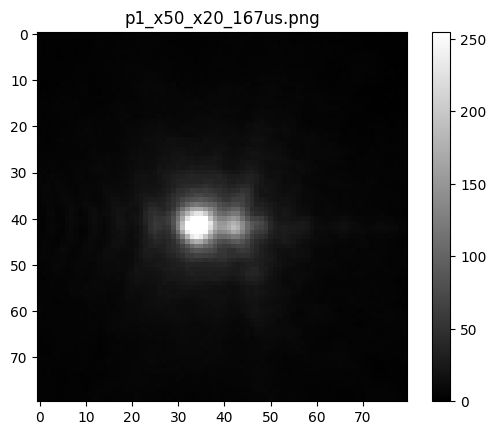

In [3]:
psf_image_filename = "./xcube_data/p1_x50_x20_167us_mono12_80x80crop.png"
# psf_image_filename = "./xcube_data/s2_x50_x20_256us_80x80crop.png"


image = step0_load_image(psf_image_filename)
print(image.dtype)
# plot_images(image, "s2_x50_x20_256us.png")
plot_images(image, "p1_x50_x20_167us.png")

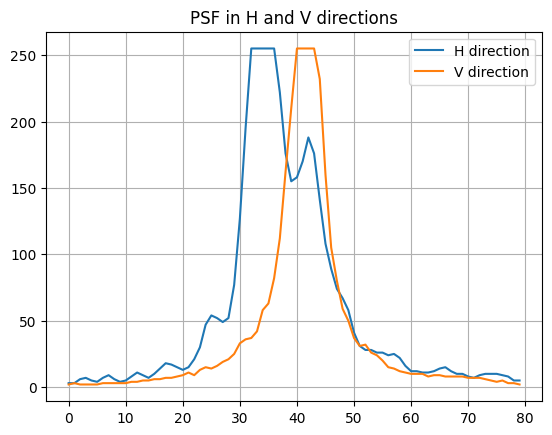

In [4]:
psf_h = step1_get_psf(image, 42, "H")
# psf_h = step1_get_psf(image, 38, "H")

psf_v = step1_get_psf(image, 33, "V")
# psf_v = step1_get_psf(image, 34, "V")

plt.title("PSF in H and V directions")
plt.grid()
plt.plot(psf_h, label="H direction")
plt.plot(psf_v, label="V direction")
plt.legend()

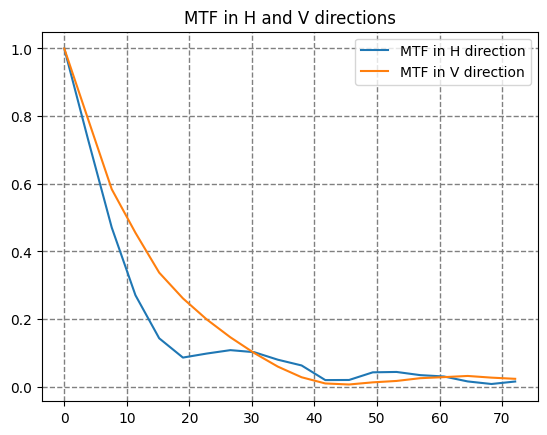

In [5]:

mtf_h, freq_h = step9_get_mtf(psf_h)
mtf_v, freq_v = step9_get_mtf(psf_v)

plt.grid(color='gray', linestyle='--', linewidth=1)

freq_numbers = 20
plt.title("MTF in H and V directions")
plt.plot(freq_h[0:freq_numbers], mtf_h[0:freq_numbers], label='MTF in H direction', linestyle='-')
plt.plot(freq_v[0:freq_numbers], mtf_v[0:freq_numbers], label='MTF in V direction', linestyle='-')

plt.legend()
